In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [86]:
iris_df = pd.read_csv("iris.data.csv",names=['sepal_length','sepal_width','petal_length','petal_width','class'])
iris_df['class'] = pd.Categorical(iris_df['class'])

In [87]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


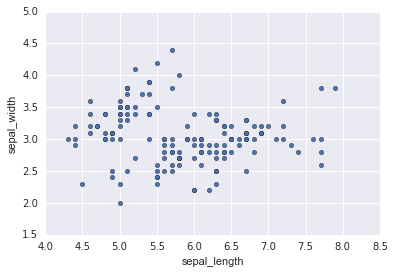

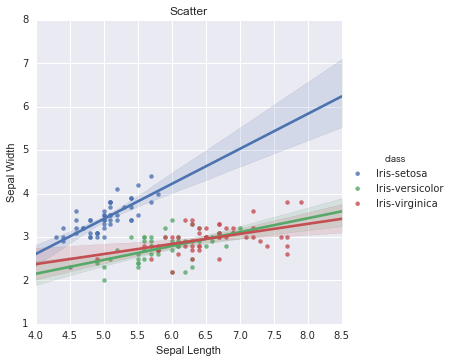

In [19]:
%matplotlib inline
iris_df.plot('sepal_length','sepal_width',kind='scatter')
sns.lmplot('sepal_length', 'sepal_width', 
           data=iris_df, 
           fit_reg=True,
           hue="class")
plt.title('Scatter')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [142]:

def pick_new_point():
#Pick a new point, programmatically at random    
    s_width = random.uniform(min(iris_df['sepal_width']),max(iris_df['sepal_width']))
    s_length = random.uniform(min(iris_df['sepal_length']),max(iris_df['sepal_length']))
    return s_length, s_width
#list1 = []
#list2 = []
#for i in range(100):
#    s_width = random.uniform(min(iris_df['sepal_width']),max(iris_df['sepal_width']))
#    s_length = random.uniform(min(iris_df['sepal_length']),max(iris_df['sepal_length']))
#    list1.append(s_width)
#    list2.append(s_length)
#plt.scatter(list2,list1)

In [181]:
# Sort each point by its distance from the new point, and subset the 10 nearest points.
random_point = pick_new_point()
dist_list = []
for i in range(len(iris_df)):
    newx = float(random_point[0])
    newy = float(random_point[1])
    x = float(iris_df['sepal_length'][[i]])
    y = float(iris_df['sepal_width'][[i]])
    distance = np.sqrt((newx-x)**2 + (newy-y)**2)
    dist_list.append(distance)
iris_df['distance'] = dist_list
# iris_df.tail()

top_10_df = iris_df.sort(columns = 'distance')[:10]
#top_10_df

majority_class = top_10_df['class'].value_counts().index[0] # this is to return the majority class from a given Series of categorical data

C:\Users\Nachiket\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [114]:
#Determine the majority class of the subset.
#sns.factorplot("class", data=top_10_df, kind="count")

Iris-setosa        50
Iris-versicolor     9
Iris-virginica      1
Name: class, dtype: int64

In [229]:
def knn(klist):
    majority_classes = []
    for j in klist:
        random_point = pick_new_point()
        dist_list = []
        for i in range(len(iris_df)):
            newx = float(random_point[0])
            newy = float(random_point[1])
            x = float(iris_df['sepal_length'][[i]])
            y = float(iris_df['sepal_width'][[i]])
            distance = np.sqrt((newx-x)**2 + (newy-y)**2)
            dist_list.append(distance)
        iris_df['distance'] = dist_list
        # iris_df.tail()

        k_df = iris_df.sort(columns = 'distance')[:j]
        #k_df

        # this is to return the majority class from a given Series of categorical data
        majority_class = top_10_df['class'].value_counts().index[0]
        majority_classes.append(majority_class)
    return dict(zip(klist, majority_classes))

In [241]:
x = [5,10,50,100]
dicti = knn(x)

C:\Users\Nachiket\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


C:\Users\Nachiket\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [244]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

iris_df = pd.read_csv("iris.data.csv",names=['sepal_length','sepal_width','petal_length','petal_width','class'])
iris_df['class'] = pd.Categorical(iris_df['class'])

"""Getting idea of the data"""
#%matplotlib inline
#iris_df.plot('sepal_length','sepal_width',kind='scatter')
#sns.lmplot('sepal_length', 'sepal_width', 
#           data=iris_df, 
#           fit_reg=True,
#           hue="class")
#plt.title('Scatter')
#plt.xlabel('Sepal Length')
#plt.ylabel('Sepal Width')

"""Predicting class from the sepal width and length using knn"""
def pick_new_point():
#Pick a new point, programmatically at random    
    s_width = random.uniform(min(iris_df['sepal_width']),max(iris_df['sepal_width']))
    s_length = random.uniform(min(iris_df['sepal_length']),max(iris_df['sepal_length']))
    return s_length, s_width
    
def knn(klist):
    majority_classes = []
    for j in klist:
        random_point = pick_new_point()
        dist_list = []
        for i in range(len(iris_df)):
            newx = float(random_point[0])
            newy = float(random_point[1])
            x = float(iris_df['sepal_length'][[i]])
            y = float(iris_df['sepal_width'][[i]])
            distance = np.sqrt((newx-x)**2 + (newy-y)**2) #Euclidian distance of every point
            dist_list.append(distance)
        iris_df['distance'] = dist_list
        # iris_df.tail()

        k_df = iris_df.sort(columns = 'distance')[:j]
        #k_df

        # this is to return the majority class from a given Series of categorical data
        majority_class = k_df['class'].value_counts().index[0]
        majority_classes.append(majority_class)
    k_values_df = pd.DataFrame({'k':klist,'majority_class':majority_classes})
    return k_values_df

In [245]:
df = knn(range(10,100))

C:\Users\Nachiket\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [249]:
df['majority_class'] = pd.Categorical(df['majority_class'])

In [250]:
df['majority_class'].head()

0       Iris-setosa
1    Iris-virginica
2    Iris-virginica
3    Iris-virginica
4       Iris-setosa
Name: majority_class, dtype: category
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]

In [255]:
sns.factorplot(data=df,'majority_class')

SyntaxError: non-keyword arg after keyword arg (<ipython-input-255-080f9f396f41>, line 1)